# Installs & Imports

In [1]:
!pip install -q yfinance arch

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats
import itertools

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Fetching

In [3]:
def fetch_data(ticker, start_date, end_date):
    """
    Fetches historical stock data from Yahoo Finance.

    Parameters:
        ticker (str): Stock ticker symbol.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame: DataFrame containing historical stock data.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [4]:
# Parameters
ticker = 'TCS.NS'
start_date = '2015-01-01'
end_date = '2024-01-01'

# Fetch data
data = fetch_data(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
def data_overview(data):
    """
    Provides an overview of the data.

    Parameters:
        data (pd.DataFrame): DataFrame containing stock data.
    """
    print("First 5 rows:")
    display(data.head())
    print("\nData Summary:")
    display(data.describe())
    print("\nData Info:")
    data.info()

In [6]:
# Data overview
data_overview(data)

First 5 rows:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2015-01-01 00:00:00+00:00,1051.877441,1272.775024,1283.500000,1270.500000,1283.500000,366830
2015-01-02 00:00:00+00:00,1065.885742,1289.724976,1295.474976,1275.300049,1275.500000,925740
2015-01-05 00:00:00+00:00,1049.687744,1270.125000,1299.949951,1262.324951,1290.500000,1754242
2015-01-06 00:00:00+00:00,1010.989624,1223.300049,1264.550049,1220.000000,1264.550049,2423784
2015-01-07 00:00:00+00:00,999.047241,1208.849976,1239.574951,1203.724976,1235.000000,2636332



Data Summary:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2.221000e+03
mean,2042.883031,2224.000765,2246.215112,2201.882232,2224.897094,2.696964e+06
std,927.145243,911.885271,918.980782,904.599162,912.158456,2.471747e+06
min,897.891907,1050.574951,1070.000000,1025.949951,1058.449951,8.682200e+04
25%,1083.651733,1282.199951,1295.474976,1271.650024,1282.500000,1.640296e+06
50%,1845.181396,2053.250000,2081.149902,2036.000000,2060.000000,2.245418e+06
75%,3051.396484,3206.000000,3230.949951,3181.000000,3210.000000,3.124416e+06
max,3806.153320,4019.149902,4043.000000,3980.000000,4033.949951,8.806715e+07



Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2221 entries, 2015-01-01 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, TCS.NS)  2221 non-null   float64
 1   (Close, TCS.NS)      2221 non-null   float64
 2   (High, TCS.NS)       2221 non-null   float64
 3   (Low, TCS.NS)        2221 non-null   float64
 4   (Open, TCS.NS)       2221 non-null   float64
 5   (Volume, TCS.NS)     2221 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 121.5 KB


# Data Preprocessing

In [7]:
def compute_log_returns(data):
    """
    Computes daily log returns and adds them to the DataFrame.

    Parameters:
        data (pd.DataFrame): DataFrame containing stock data.

    Returns:
        pd.DataFrame: DataFrame with log returns.
    """
    data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    data = data.dropna()
    return data

In [8]:
# Log returns
data = compute_log_returns(data)

In [9]:
def plot_data(data):
    """
    Plots closing prices and log returns.

    Parameters:
        data (pd.DataFrame): DataFrame containing stock data.
    """
    plt.figure(figsize=(8, 4))
    plt.subplot(2, 1, 1)
    plt.plot(data['Adj Close'])
    plt.title('Adjusted Closing Price')
    plt.subplot(2, 1, 2)
    plt.plot(data['Log_Returns'], color='red')
    plt.title('Log Returns')
    plt.tight_layout()
    plt.show()

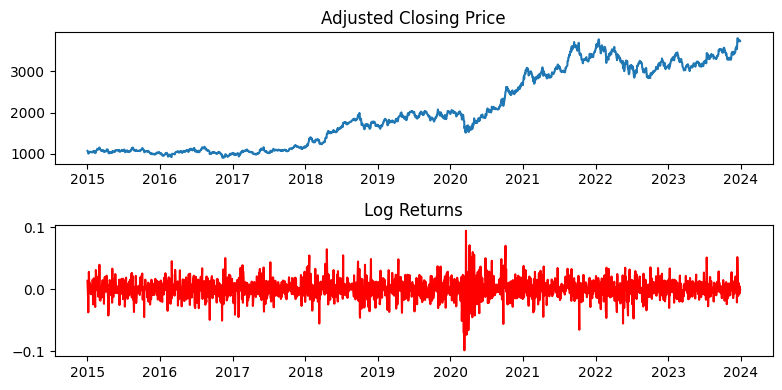

In [10]:
# Plot the data
plot_data(data)

# Data Exploration

In [11]:
def explore_data(data):
    """
    Explores the data by plotting histograms, boxplots, and autocorrelation plots.

    Parameters:
        data (pd.DataFrame): DataFrame containing stock data.
    """
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(data['Log_Returns'], bins=50, kde=True)
    plt.title('Histogram of Log Returns')
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=data['Log_Returns'])
    plt.title('Boxplot of Log Returns')
    plt.show()

    # Autocorrelation
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    plt.figure(figsize=(6, 4))
    plot_acf(data['Log_Returns'], lags=50)
    plt.show()
    plt.figure(figsize=(6, 4))
    plot_pacf(data['Log_Returns'], lags=50)
    plt.show()

    # Test for stationarity
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(data['Log_Returns'])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

    if result[1] <= 0.05:
        print("\nReject the null hypothesis. The data is stationary.")
    else:
        print("\nFail to reject the null hypothesis. The data is not stationary.")

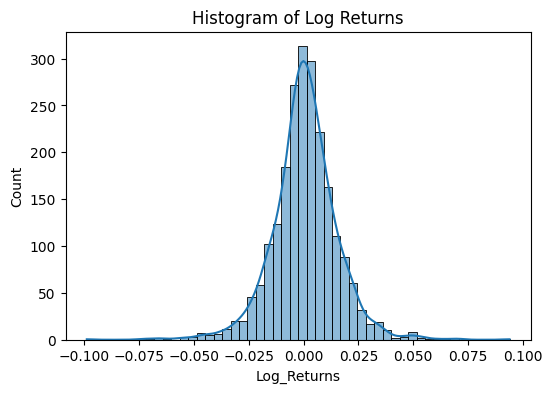

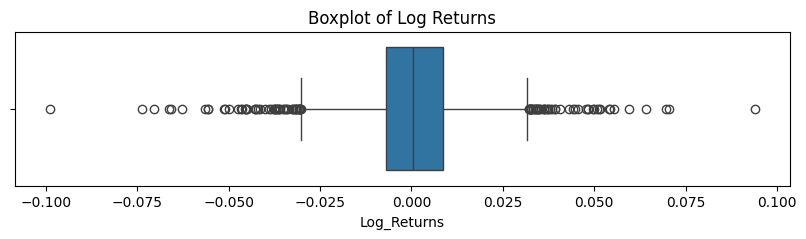

<Figure size 600x400 with 0 Axes>

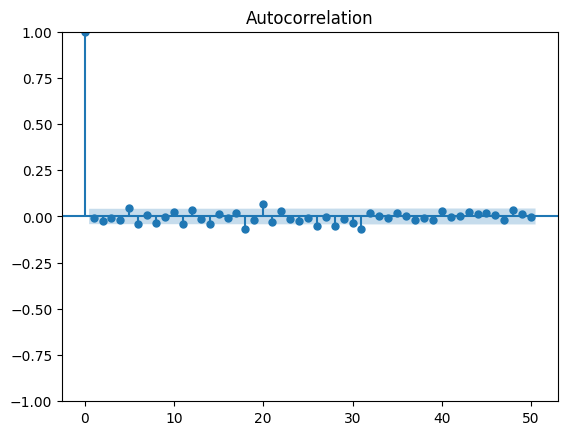

<Figure size 600x400 with 0 Axes>

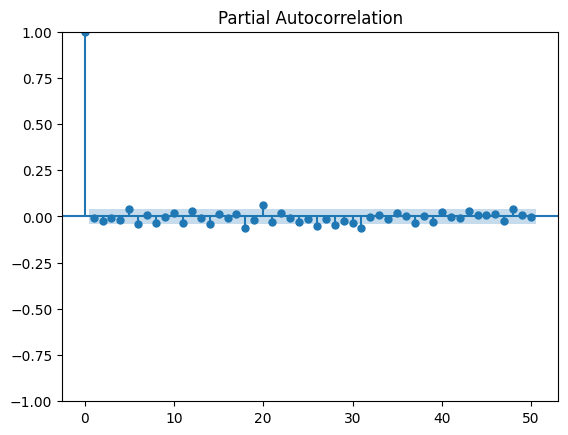

ADF Statistic: -10.887616096775
p-value: 1.2483810437440526e-19
Critical Values:
   1%, -3.433325884732626
Critical Values:
   5%, -2.862854651280992
Critical Values:
   10%, -2.5674698530991735

Reject the null hypothesis. The data is stationary.


In [12]:
# EDA
explore_data(data)

# Modeling & Tuning

In [13]:
def hyperparameter_tuning(data, p_values, q_values):
    """
    Performs hyperparameter tuning for GARCH models.

    Parameters:
        data (pd.DataFrame): DataFrame containing log returns.
        p_values (list): List of p values to try.
        q_values (list): List of q values to try.

    Returns:
        pd.DataFrame: DataFrame containing AIC and BIC scores for each model.
    """
    import itertools
    results = []
    for p, q in itertools.product(p_values, q_values):
        try:
            model = arch_model(data['Log_Returns'], vol='GARCH', p=p, q=q)
            res = model.fit(disp='off')
            results.append([p, q, res.aic, res.bic])
        except:
            continue
    results_df = pd.DataFrame(results, columns=['p','q','AIC','BIC'])
    return results_df

In [14]:
# Tune the parameters
p_values = range(1, 4)
q_values = range(1, 4)
tuning_results = hyperparameter_tuning(data, p_values, q_values)
tuning_results.sort_values('AIC')

,p,q,AIC,BIC
3,2,1,-12541.657245,-12513.130932
0,1,1,-12540.906459,-12518.085409
4,2,2,-12539.975671,-12505.744096
6,3,1,-12539.658679,-12505.427104
5,2,3,-12539.581011,-12499.644174
1,1,2,-12535.315423,-12506.789110
2,1,3,-12532.011340,-12497.779765
7,3,2,-12526.314422,-12486.377585
8,3,3,-12526.117272,-12480.475172


In [15]:
# Get best parameters
best_model_params = tuning_results.loc[tuning_results['AIC'].idxmin()]
p_best = int(best_model_params['p'])
q_best = int(best_model_params['q'])
print(f"Best model order: p={p_best}, q={q_best}")

Best model order: p=2, q=1


In [16]:
def fit_garch_model(data, p, q, model_type='GARCH', o=0, power=2.0, dist='normal'):
    """
    Fits a GARCH family model to the data.

    Parameters:
        data (pd.DataFrame): DataFrame containing log returns.
        p (int): Order of the GARCH component.
        q (int): Order of the ARCH component.
        model_type (str): Type of model ('GARCH', 'EGARCH', etc.).
        o (int): Order of the asymmetric term (for models like GJR-GARCH).
        power (float): Power term for models like APARCH.
        dist (str): Distribution assumption ('normal', 't', etc.).

    Returns:
        arch.univariate.base.ARCHModelResult: Fitted model result.
    """
    if model_type == 'GJR-GARCH':
        model = arch_model(data['Log_Returns'], vol='GARCH', p=p, o=o, q=q, power=power, dist=dist)
    else:
        model = arch_model(data['Log_Returns'], vol=model_type, p=p, q=q, dist=dist)
    res = model.fit(disp='off')
    return res

In [17]:
# Fit GARCH(1, 1) model
garch_fit = fit_garch_model(data, p_best, q_best)
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6275.83
Distribution:                  Normal   AIC:                          -12541.7
Method:            Maximum Likelihood   BIC:                          -12513.1
                                        No. Observations:                 2220
Date:                Thu, Oct 31 2024   Df Residuals:                     2219
Time:                        03:58:04   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.7388e-04  2.880e-04      1.992  4.633e-02 [9.

# Model Evaluation

In [18]:
def evaluate_model(fit_result):
    """
    Evaluates the model by checking the residuals.

    Parameters:
        fit_result (arch.univariate.base.ARCHModelResult): Fitted model result.
    """
    residuals = fit_result.resid / fit_result.conditional_volatility
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(residuals, color='green')
    plt.title('Standardized Residuals')
    plt.subplot(2, 1, 2)
    sns.histplot(residuals, bins=50, kde=True, color='green')
    plt.title('Histogram of Standardized Residuals')
    plt.tight_layout()
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(6, 4))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Ljung-Box test
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print("Ljung-Box test for autocorrelation in residuals:")
    display(lb_test)

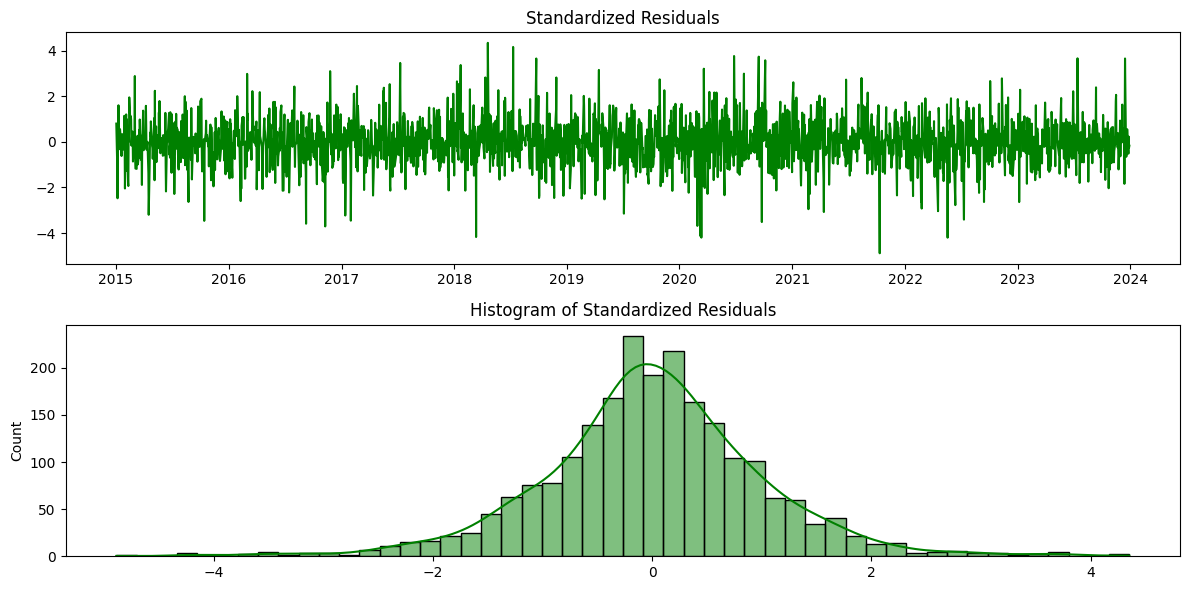

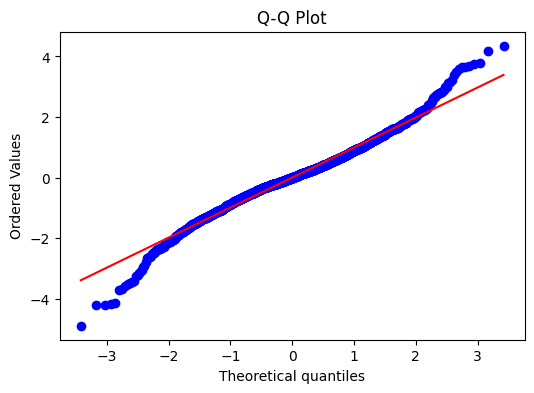

Ljung-Box test for autocorrelation in residuals:


,lb_stat,lb_pvalue
10,8.142567,0.614913


In [19]:
# Evaluation
evaluate_model(garch_fit)

In [20]:
def forecast_volatility(fit_result, horizon, method='simulation', simulations=1000):
    """
    Forecasts future volatility.

    Parameters:
        fit_result (arch.univariate.base.ARCHModelResult): Fitted model result.
        horizon (int): Number of days to forecast.
        method (str): Forecasting method ('analytic' or 'simulation').
        simulations (int): Number of simulations (if method is 'simulation').

    Returns:
        pd.Series: Series containing forecasted volatility.
    """
    forecast = fit_result.forecast(horizon=horizon, method=method, simulations=simulations)
    forecast_variance = forecast.variance.iloc[-1]
    forecast_volatility = np.sqrt(forecast_variance)
    return forecast_volatility

In [21]:
# Forecast volatility
forecast_horizon = 30
forecasted_volatility = forecast_volatility(garch_fit, forecast_horizon, method='simulation', simulations=1000)

In [22]:
def plot_volatility(data, forecasted_volatility, title='Historical and Forecasted Volatility'):
    """
    Plots historical and forecasted volatility.

    Parameters:
        data (pd.DataFrame): DataFrame containing log returns.
        forecasted_volatility (pd.Series): Series containing forecasted volatility.
        title (str): Title of the plot.
    """
    # Historical volatility (rolling standard deviation)
    rolling_volatility = data['Log_Returns'].rolling(window=30).std()

    # Combine historical and forecasted volatility
    last_date = data.index[-1]
    future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=len(forecasted_volatility), freq='B')
    forecasted_volatility.index = future_dates

    plt.figure(figsize=(8, 4))
    plt.plot(rolling_volatility, label='Historical Volatility', color='blue')
    plt.plot(forecasted_volatility, label='Forecasted Volatility', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

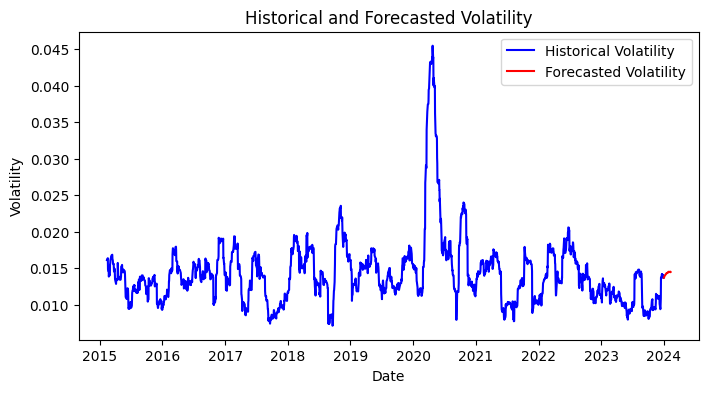

In [23]:
# Plot volatility
plot_volatility(data, forecasted_volatility)

# Model Comparison

In [24]:
def compare_models(data, models, p, q):
    """
    Compares different volatility models.

    Parameters:
        data (pd.DataFrame): DataFrame containing log returns.
        models (list): List of model types to compare.
        p (int): Order of the GARCH component.
        q (int): Order of the ARCH component.

    Returns:
        pd.DataFrame: DataFrame containing AIC and BIC scores for each model.
    """
    results = []
    for model_info in models:
        model_type = model_info['model']
        dist = model_info.get('dist', 'normal')
        o = model_info.get('o', 0)
        try:
            fit_result = fit_garch_model(data, p, q, model_type=model_type, o=o, dist=dist)
            results.append({'Model': model_type, 'Distribution': dist, 'AIC': fit_result.aic, 'BIC': fit_result.bic})
        except Exception as e:
            print(f"Error fitting model {model_type} with distribution {dist}: {e}")
    results_df = pd.DataFrame(results)
    return results_df

In [25]:
# Compare models
models_to_compare = [
    {'model': 'GARCH'},
    {'model': 'EGARCH'},
    {'model': 'GJR-GARCH', 'o': p_best},
    {'model': 'APARCH'},
    {'model': 'GARCH', 'dist': 't'},
    {'model': 'EGARCH', 'dist': 't'},
    {'model': 'GJR-GARCH', 'o': p_best, 'dist': 't'},
    {'model': 'APARCH', 'dist': 't'}
]

comparison_results = compare_models(data, models_to_compare, p_best, q_best)
comparison_results = comparison_results.sort_values('AIC').reset_index(drop=True)
comparison_results

,Model,Distribution,AIC,BIC
0,EGARCH,t,-12692.193333,-12657.961758
1,APARCH,t,-12671.691708,-12631.754871
2,GARCH,t,-12669.402483,-12635.170908
3,GARCH,normal,-12541.657245,-12513.130932
4,APARCH,normal,-12541.542137,-12507.310562
5,EGARCH,normal,-12539.787333,-12511.261021
6,GJR-GARCH,normal,-12532.517778,-12492.580940
7,GJR-GARCH,t,-9919.679594,-9874.037495


In [26]:
# Select the best model based on AIC
best_model_info = models_to_compare[comparison_results.index[0]]
best_model_type = best_model_info['model']
best_dist = best_model_info.get('dist', 'normal')
best_o = best_model_info.get('o', 0)

print(f"Best model: {best_model_type} with distribution {best_dist}")

Best model: GARCH with distribution normal


In [27]:
# Fit the best model
best_model_fit = fit_garch_model(data, p_best, q_best, model_type=best_model_type, o=best_o, dist=best_dist)
print(best_model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6275.83
Distribution:                  Normal   AIC:                          -12541.7
Method:            Maximum Likelihood   BIC:                          -12513.1
                                        No. Observations:                 2220
Date:                Thu, Oct 31 2024   Df Residuals:                     2219
Time:                        03:58:12   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.7388e-04  2.880e-04      1.992  4.633e-02 [9.

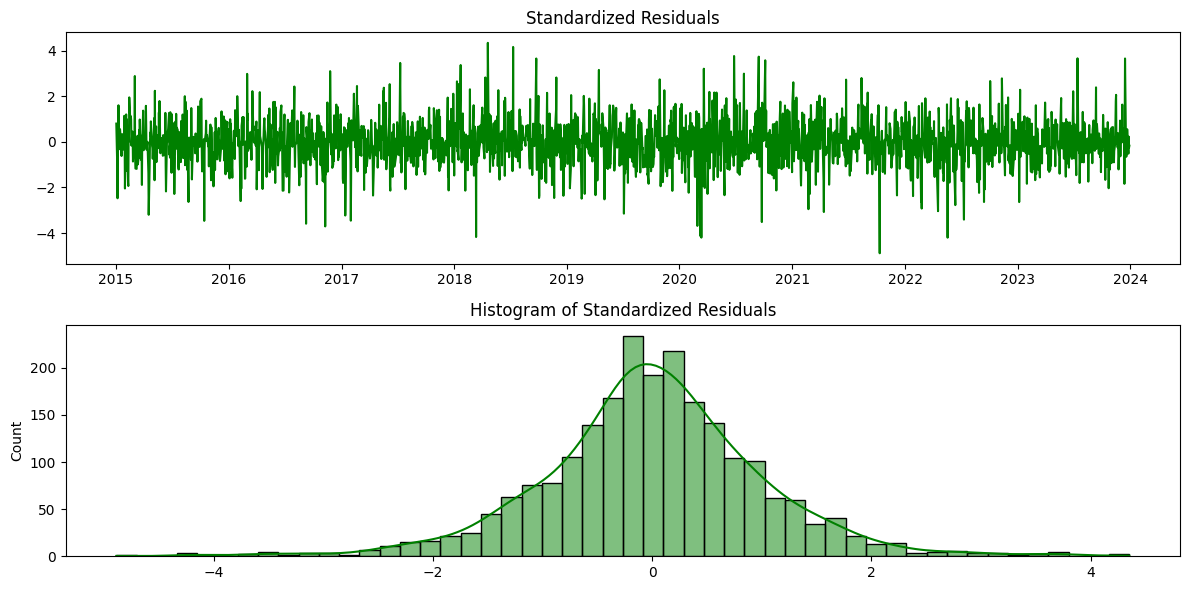

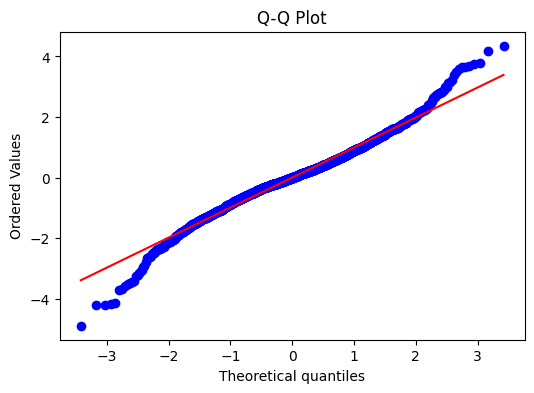

Ljung-Box test for autocorrelation in residuals:


,lb_stat,lb_pvalue
10,8.142567,0.614913


In [28]:
# Evaluation
evaluate_model(best_model_fit)

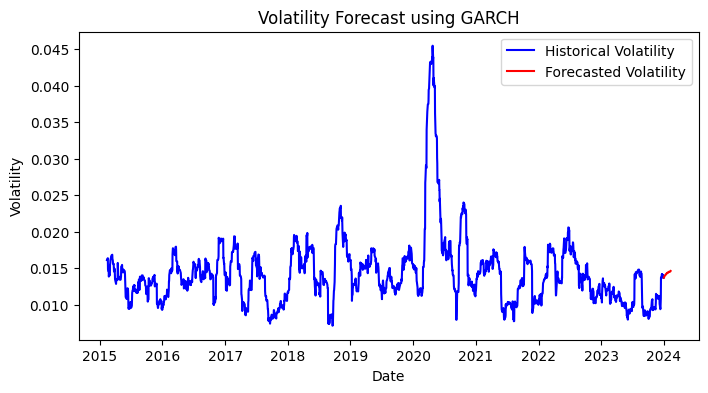

In [29]:
# Forecast and plot volatility
forecasted_volatility_best = forecast_volatility(best_model_fit, forecast_horizon, method='simulation', simulations=1000)
plot_volatility(data, forecasted_volatility_best, title=f'Volatility Forecast using {best_model_type}')

In [30]:
def backtest_volatility_model(data, model_type, p, q, o=0, dist='normal'):
    """
    Backtests the volatility model by rolling forecast.

    Parameters:
        data (pd.DataFrame): DataFrame containing log returns.
        model_type (str): Type of model ('GARCH', 'EGARCH', etc.).
        p (int): Order of the GARCH component.
        q (int): Order of the ARCH component.
        o (int): Order of the asymmetric term.
        dist (str): Distribution assumption.

    Returns:
        pd.Series: Series containing predicted volatility.
    """
    rolling_predictions = []
    test_size = int(len(data) * 0.2)
    train_data = data['Log_Returns'][:-test_size]
    test_data = data['Log_Returns'][-test_size:]

    for i in range(test_size):
        train_slice = data['Log_Returns'][:-(test_size - i)]
        model = fit_garch_model(train_slice.to_frame(), p, q, model_type=model_type, o=o, dist=dist)
        pred = model.forecast(horizon=1)
        pred_vol = np.sqrt(pred.variance.values[-1][0])
        rolling_predictions.append(pred_vol)

    rolling_predictions = pd.Series(rolling_predictions, index=test_data.index)
    return rolling_predictions

In [31]:
# Backtesting
rolling_predictions = backtest_volatility_model(data, best_model_type, p_best, q_best, o=best_o, dist=best_dist)

In [32]:
def plot_backtest_results(test_data, predictions):
    """
    Plots the backtest results.

    Parameters:
        test_data (pd.Series): Actual log returns.
        predictions (pd.Series): Predicted volatility.
    """
    plt.figure(figsize=(8, 4))
    plt.plot(test_data.index, test_data.abs(), label='Absolute Returns', color='blue')
    plt.plot(predictions.index, predictions, label='Predicted Volatility', color='red')
    plt.title('Backtesting Volatility Predictions')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

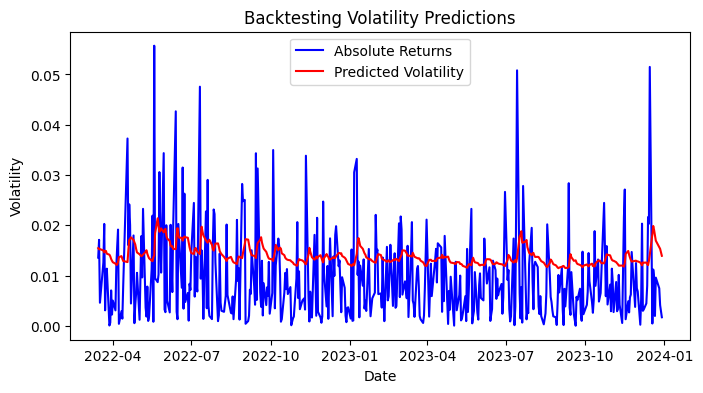

In [33]:
# Plot backtest results
test_data = data['Log_Returns'][-len(rolling_predictions):]
plot_backtest_results(test_data, rolling_predictions)